### Exploring Credit Risks

This activity is another open exploration of a dataset using both cleaning methods and visualizations.  The data describes customers as good or bad credit risks based on a small set of features specified below.  Your task is to create a Jupyter notebook with an exploration of the data using both your `pandas` cleaning and analysis skills and your visualization skills using `matplotlib`, `seaborn`, and `plotly`.  Your final notebook should be formatted with appropriate headers and markdown cells with written explanations for the code that follows. 

Post your notebook file in Canvas, as well as a brief (3-4 sentence) description of what you found through your analysis. Respond to your peers with reflections on thier analysis. 

-----


## Data Description

```
1. Status of existing checking account, in Deutsche Mark.
2. Duration in months
3. Credit history (credits taken, paid back duly, delays, critical accounts)
4. Purpose of the credit (car, television,...)
5. Credit amount
6. Status of savings account/bonds, in Deutsche Mark.
7. Present employment, in number of years.
8. Installment rate in percentage of disposable income
9. Personal status (married, single,...) and sex
10. Other debtors / guarantors
11. Present residence since X years
12. Property (e.g. real estate)
13. Age in years
14. Other installment plans (banks, stores)
15. Housing (rent, own,...)
16. Number of existing credits at this bank
17. Job
18. Number of people being liable to provide maintenance for
19. Telephone (yes,no)
20. Foreign worker (yes,no)
```

In [113]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.figure_factory import create_table

In [114]:
df = pd.read_csv('data/dataset_31_credit-g.csv')

In [115]:
df.head(15)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
5,'no checking',36,'existing paid',education,9055,'no known savings','1<=X<4',2,'male single',none,...,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good
6,'no checking',24,'existing paid',furniture/equipment,2835,'500<=X<1000','>=7',3,'male single',none,...,'life insurance',53,none,own,1,skilled,1,none,yes,good
7,'0<=X<200',36,'existing paid','used car',6948,'<100','1<=X<4',2,'male single',none,...,car,35,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good
8,'no checking',12,'existing paid',radio/tv,3059,'>=1000','4<=X<7',2,'male div/sep',none,...,'real estate',61,none,own,1,'unskilled resident',1,none,yes,good
9,'0<=X<200',30,'critical/other existing credit','new car',5234,'<100',unemployed,4,'male mar/wid',none,...,car,28,none,own,2,'high qualif/self emp/mgmt',1,none,yes,bad


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [117]:
# statistical summary
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [118]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

### Data cleansing, reformatting and removing irrelevant data as (<>, /) characters

In [119]:
# formatting data in the columns, and removing irrelevant characters 
def format_column(col_val):
    import re
    patterns = {r"[^A-Za-z0-9-/]+": " ", r"\sX\s": "x", r"/": ", "}
    if isinstance(col_val, str):
        for pattern, val in patterns.items():
            col_val = re.sub(pattern, val, str(col_val).rstrip().lstrip())
    return col_val

df_new = df.copy()
for column in df_new.columns:
    df_new[column] = df_new[column].apply(format_column)
df_new = df_new.rename(columns={'class':'credit_class'})
df_new.head(100)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,credit_class
0,0,6,"critical, other existing credit","radio, tv",1169,no known savings,7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0x200,48,existing paid,"radio, tv",5951,100,1x4,2,"female div, dep, mar",none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,"critical, other existing credit",education,2096,100,4x7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,0,42,existing paid,"furniture, equipment",7882,100,4x7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,0,24,delayed previously,new car,4870,100,1x4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0x200,54,"no credits, all paid",business,15945,100,1,3,male single,none,...,no known property,58,none,rent,1,skilled,1,yes,yes,bad
96,no checking,12,"critical, other existing credit",education,2012,no known savings,4x7,4,"female div, dep, mar",none,...,car,61,none,own,1,skilled,1,none,yes,good
97,0x200,18,existing paid,business,2622,100x500,1x4,4,male single,none,...,car,34,none,own,1,skilled,1,none,yes,good
98,0x200,36,"critical, other existing credit","radio, tv",2337,100,7,4,male single,none,...,real estate,36,none,own,1,skilled,1,none,yes,good


### Dealing with the missing data

In [120]:
# check if there are any null values
df_new.isnull().values.any()

False

In [121]:
# check how many null values
df_new.isnull().values.sum()

0

### Encoding the categorical data

In [122]:
df_new.select_dtypes(include='object').columns

Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker', 'credit_class'],
      dtype='object')

In [123]:
from pprint import pprint
for col in df_new.select_dtypes(include='object').columns.tolist():
    pprint(f"++++++++++++++++++{col}++++++++++++++++++")
    pprint(f"{df_new[col].unique()} : {df_new[col].nunique()}")
    print()
    

'++++++++++++++++++checking_status++++++++++++++++++'
"['0' '0x200' 'no checking' '200'] : 4"

'++++++++++++++++++credit_history++++++++++++++++++'
("['critical, other existing credit' 'existing paid' 'delayed previously'\n"
 " 'no credits, all paid' 'all paid'] : 5")

'++++++++++++++++++purpose++++++++++++++++++'
("['radio, tv' 'education' 'furniture, equipment' 'new car' 'used car'\n"
 " 'business' 'domestic appliance' 'repairs' 'other' 'retraining'] : 10")

'++++++++++++++++++savings_status++++++++++++++++++'
"['no known savings' '100' '500x1000' '1000' '100x500'] : 5"

'++++++++++++++++++employment++++++++++++++++++'
"['7' '1x4' '4x7' 'unemployed' '1'] : 5"

'++++++++++++++++++personal_status++++++++++++++++++'
"['male single' 'female div, dep, mar' 'male div, sep' 'male mar, wid'] : 4"

'++++++++++++++++++other_parties++++++++++++++++++'
"['none' 'guarantor' 'co applicant'] : 3"

'++++++++++++++++++property_magnitude++++++++++++++++++'
"['real estate' 'life insurance' 'no known pr

### Data Analytics and Visualization

In [124]:
# New formatted data frame
df_new

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,credit_class
0,0,6,"critical, other existing credit","radio, tv",1169,no known savings,7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0x200,48,existing paid,"radio, tv",5951,100,1x4,2,"female div, dep, mar",none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,"critical, other existing credit",education,2096,100,4x7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,0,42,existing paid,"furniture, equipment",7882,100,4x7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,0,24,delayed previously,new car,4870,100,1x4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,"furniture, equipment",1736,100,4x7,3,"female div, dep, mar",none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,0,30,existing paid,used car,3857,100,1x4,4,"male div, sep",none,...,life insurance,40,none,own,1,"high qualif, self emp, mgmt",1,yes,yes,good
997,no checking,12,existing paid,"radio, tv",804,100,7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,0,45,existing paid,"radio, tv",1845,100,1x4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


#### Bad Credit Rating

In [125]:
# Bad Credit Status
df_new_bad = df_new[df_new.credit_class=='bad']
df_new_bad

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,credit_class
1,0x200,48,existing paid,"radio, tv",5951,100,1x4,2,"female div, dep, mar",none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
4,0,24,delayed previously,new car,4870,100,1x4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
9,0x200,30,"critical, other existing credit",new car,5234,100,unemployed,4,"male mar, wid",none,...,car,28,none,own,2,"high qualif, self emp, mgmt",1,none,yes,bad
10,0x200,12,existing paid,new car,1295,100,1,3,"female div, dep, mar",none,...,car,25,none,rent,1,skilled,1,none,yes,bad
11,0,48,existing paid,business,4308,100,1,3,"female div, dep, mar",none,...,life insurance,24,none,rent,1,skilled,1,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,0x200,15,all paid,new car,1264,100x500,1x4,2,"male mar, wid",none,...,life insurance,25,none,rent,1,skilled,1,none,yes,bad
980,0x200,30,"critical, other existing credit","furniture, equipment",8386,100,4x7,2,male single,none,...,life insurance,49,none,own,1,skilled,1,none,yes,bad
981,no checking,48,existing paid,business,4844,100,unemployed,3,male single,none,...,car,33,bank,rent,1,"high qualif, self emp, mgmt",1,yes,yes,bad
983,0,36,existing paid,used car,8229,100,1x4,2,male single,none,...,life insurance,26,none,own,1,skilled,2,none,yes,bad


In [126]:
df_bad = df_new_bad.groupby(['personal_status','age','employment']).apply(lambda x: x)[['credit_amount','duration','job','existing_credits','installment_commitment','other_parties', 'housing']]
df_bad

credit_amount  duration  \
personal_status      age employment                                
female div, dep, mar 19  1          633           1980         9   
                     20  1x4        155           1282        12   
                                    585           2039        18   
                                    593           2718        24   
                     21  1x4        618           3441        30   
...                                                ...       ...   
male single          65  1x4        624           2600        18   
                     66  1x4        137            766        12   
                         7          213           1908        30   
                     68  1x4        846           6761        18   
                         7          917          14896         6   

                                                                 job  \
personal_status      age employment                                    
female div, dep, mar 19  1          633                      skilled   
                     20  1x4        155                      skilled   
                                    585                      skilled   
                                    593           unskilled resident   
                     21  1x4        618                      skilled   
...                                                              ...   
male single          65  1x4        624                      skilled   
                     66  1x4        137           unskilled resident   
                         7          213  high qualif, self emp, mgmt   
                     68  1x4        846                      skilled   
                         7          917  high qualif, self emp, mgmt   

                                         existing_credits  \
personal_status      age employment                         
female div, dep, mar 19  1          633                 2   
                     20  1x4        155                 1   
                                    585                 1   
                                    593                 1   
                     21  1x4        618                 1   
...                                                   ...   
male single          65  1x4        624                 2   
                     66  1x4        137                 1   
                         7          213                 1   
                     68  1x4        846                 2   
                         7          917                 1   

                                         installment_commitment other_parties  \
personal_status      age employment                                             
female div, dep, mar 19  1          633                       2  co applicant   
                     20  1x4        155                       2          none   
                                    585                       1          none   
                                    593                       3          none   
                     21  1x4        618                       2  co applicant   
...                                                         ...           ...   
male single          65  1x4        624                       4          none   
                     66  1x4        137                       4          none   
                         7          213                       4          none   
                     68  1x4        846                       2          none   
                         7          917                       1          none   

                                          housing  
personal_status      age employment                
female div, dep, mar 19  1          633      rent  
                     20  1x4        155      rent  
                                    585      rent  
                                    593      rent  
                     21  1x4        618      rent  
...    

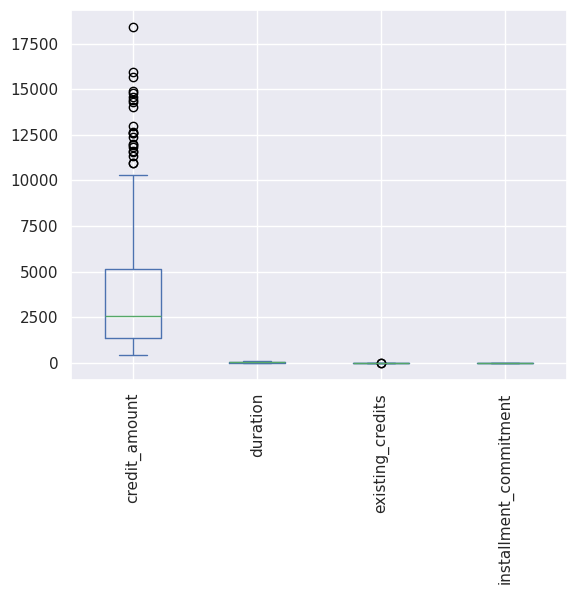

In [127]:
df_bad.plot(kind='box',legend=True, rot=0)
plt.xticks(rotation=90)
plt.show()

#### Good Credit Rating 

In [128]:
# Good Credit Status
df_new_good = df_new[df_new.credit_class=='good']
df_new_good

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,credit_class
0,0,6,"critical, other existing credit","radio, tv",1169,no known savings,7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
2,no checking,12,"critical, other existing credit",education,2096,100,4x7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,0,42,existing paid,"furniture, equipment",7882,100,4x7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
5,no checking,36,existing paid,education,9055,no known savings,1x4,2,male single,none,...,no known property,35,none,for free,1,unskilled resident,2,yes,yes,good
6,no checking,24,existing paid,"furniture, equipment",2835,500x1000,7,3,male single,none,...,life insurance,53,none,own,1,skilled,1,none,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,no checking,12,existing paid,new car,2390,no known savings,7,4,male single,none,...,car,50,none,own,1,skilled,1,yes,yes,good
995,no checking,12,existing paid,"furniture, equipment",1736,100,4x7,3,"female div, dep, mar",none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,0,30,existing paid,used car,3857,100,1x4,4,"male div, sep",none,...,life insurance,40,none,own,1,"high qualif, self emp, mgmt",1,yes,yes,good
997,no checking,12,existing paid,"radio, tv",804,100,7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good


In [129]:
df_good = df_new_good.groupby(['personal_status','age','employment']).apply(lambda x: x)[['property_magnitude', 'savings_status','installment_commitment','existing_credits','credit_amount']]
df_good

property_magnitude    savings_status  \
personal_status      age employment                                            
female div, dep, mar 19  1          391        real estate              1000   
                     20  1          167        real estate              1000   
                                    296                car  no known savings   
                         1x4        865                car          500x1000   
                         4x7        420                car              1000   
...                                                    ...               ...   
male single          70  unemployed 163  no known property               100   
                     74  1x4        606        real estate               100   
                                    756        real estate               100   
                         4x7        430        real estate               100   
                     75  unemployed 330  no known property               100   

                                         installment_commitment  \
personal_status      age employment                               
female div, dep, mar 19  1          391                       1   
                     20  1          167                       4   
                                    296                       1   
                         1x4        865                       2   
                         4x7        420                       2   
...                                                         ...   
male single          70  unemployed 163                       2   
                     74  1x4        606                       3   
                                    756                       1   
                         4x7        430                       1   
                     75  unemployed 330                       2   

                                         existing_credits  credit_amount  
personal_status      age employment                                       
female div, dep, mar 19  1          391                 1            983  
                     20  1          167                 1           1577  
                                    296                 1           4675  
                         1x4        865                 1           2221  
                         4x7        420                 1           3186  
...                                                   ...            ...  
male single          70  unemployed 163                 1           7308  
                     74  1x4        606                 1           4526  
                                    756                 3           1299  
                         4x7        430                 1           3448  
                     75  unemployed 330                 2           6615  

[700 rows x 5 columns]

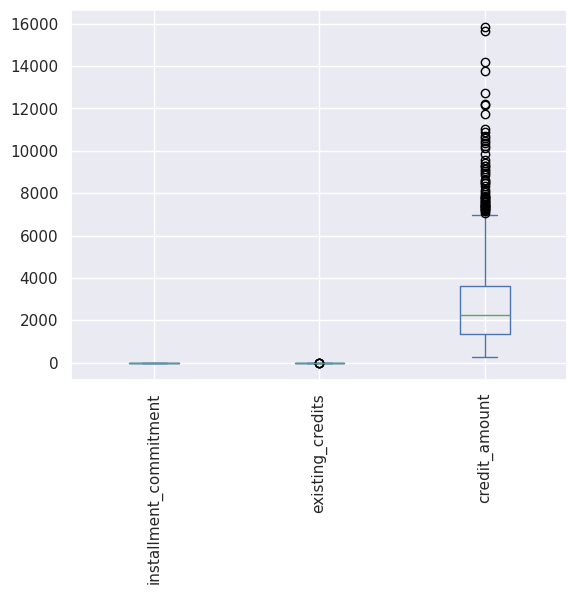

In [130]:
df_good.plot(kind='box', legend=True, rot=0)
plt.xticks(rotation=90)
plt.show()

### Overall Data Analysis

In [131]:
df_new_credit = df_new.groupby(['credit_class', 'duration', 'credit_amount'],group_keys=True).apply(lambda x: x)[['credit_history','purpose']]
df_new_credit

credit_history  \
credit_class duration credit_amount                                        
bad          6        433           721                         all paid   
                      448           471                    existing paid   
                      931           595                         all paid   
                      1198          711                         all paid   
                      1209          485               delayed previously   
...                                                                  ...   
good         60       9157          616               delayed previously   
                      10144         134                    existing paid   
                      10366         672                    existing paid   
                      13756         373  critical, other existing credit   
                      15653         637               delayed previously   

                                           purpose  
credit_class duration credit_amount                 
bad          6        433           721  education  
                      448           471  education  
                      931           595    new car  
                      1198          711  education  
                      1209          485    new car  
...                                            ...  
good         60       9157          616  radio, tv  
                      10144         134  radio, tv  
                      10366         672    new car  
                      13756         373    new car  
                      15653         637  radio, tv  

[1000 rows x 2 columns]

In [132]:
px.scatter_3d(df_new, x='duration', y='credit_amount', z='purpose',color='credit_class')

In [133]:
df_new.groupby(['credit_class','purpose'])[['credit_amount']].agg(sum)

/tmp/ipykernel_9263/3874773620.py:1: FutureWarning:

The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



credit_amount
credit_class purpose                            
bad          business                     191163
             domestic appliance             6284
             education                     71591
             furniture, equipment         211439
             new car                      308231
             other                         57830
             radio, tv                    172373
             repairs                       22329
             retraining                      902
             used car                     139296
good         business                     212167
             domestic appliance            11692
             education                     87429
             furniture, equipment         343686
             new car                      408517
             other                         40682
             radio, tv                    524170
             repairs                       37689
             retraining                     9951
             used car                     413837

In [134]:

px.bar(df_new, x='purpose', y='credit_amount', color='credit_class')

### Numeric Representation of categorical data

In [135]:

# creating numeric data frame
df_num = df_new.copy()
for column in df_new.select_dtypes(include='object').columns.tolist():
    df_num[column] = pd.factorize(df_num[column])[0]
df_num.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,credit_class
0,0,6,0,0,1169,0,0,4,0,0,...,0,67,0,0,2,0,1,0,0,0
1,1,48,1,0,5951,1,1,2,1,0,...,0,22,0,0,1,0,1,1,0,1
2,2,12,0,1,2096,1,2,2,0,0,...,0,49,0,0,1,1,2,1,0,0
3,0,42,1,2,7882,1,2,2,0,1,...,1,45,0,1,1,0,2,1,0,0
4,0,24,2,3,4870,1,1,3,0,0,...,2,53,0,1,2,0,2,1,0,1


### Create a Correlation matrix to evaluate Relationship among the Variables

/usr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/usr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/usr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/usr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/usr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

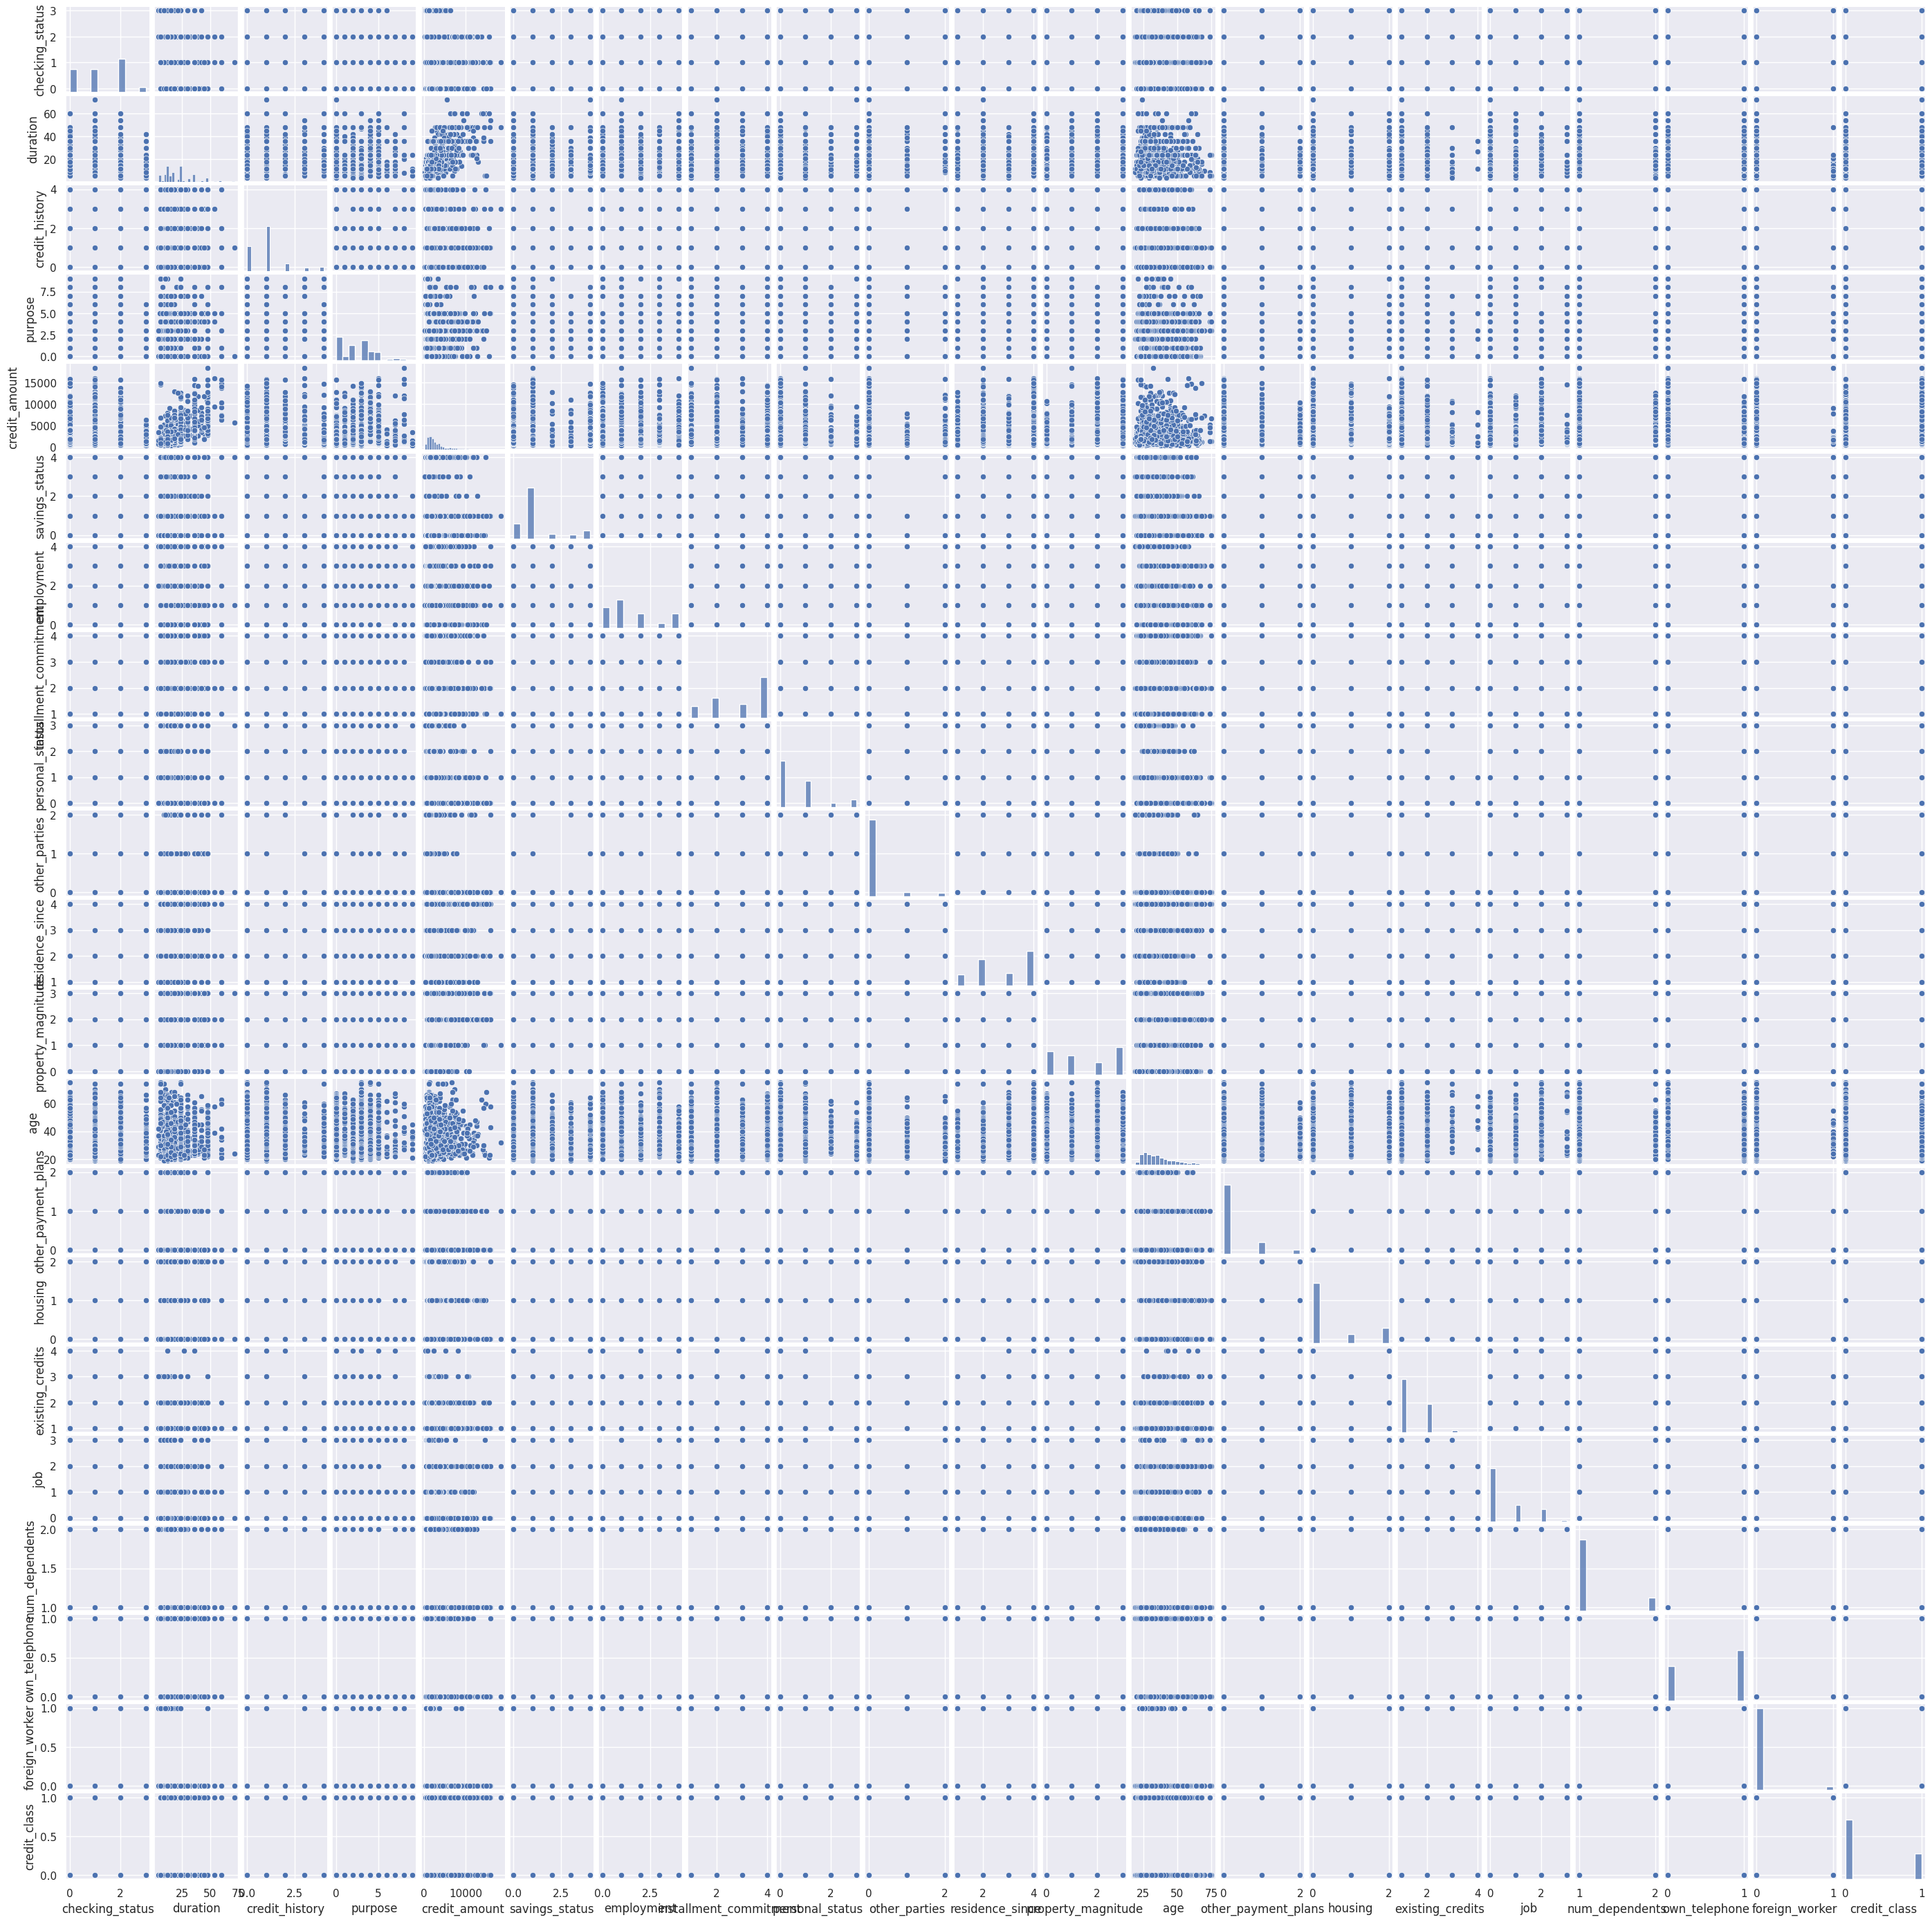

In [136]:
# This plot needs large monitor, and solid machine(cpu, ram, gpu), otherwise it will change to tight figure layout
sns.set()
g = sns.pairplot(df_num)
g.fig.set_size_inches(28,28)
g


<Axes: >

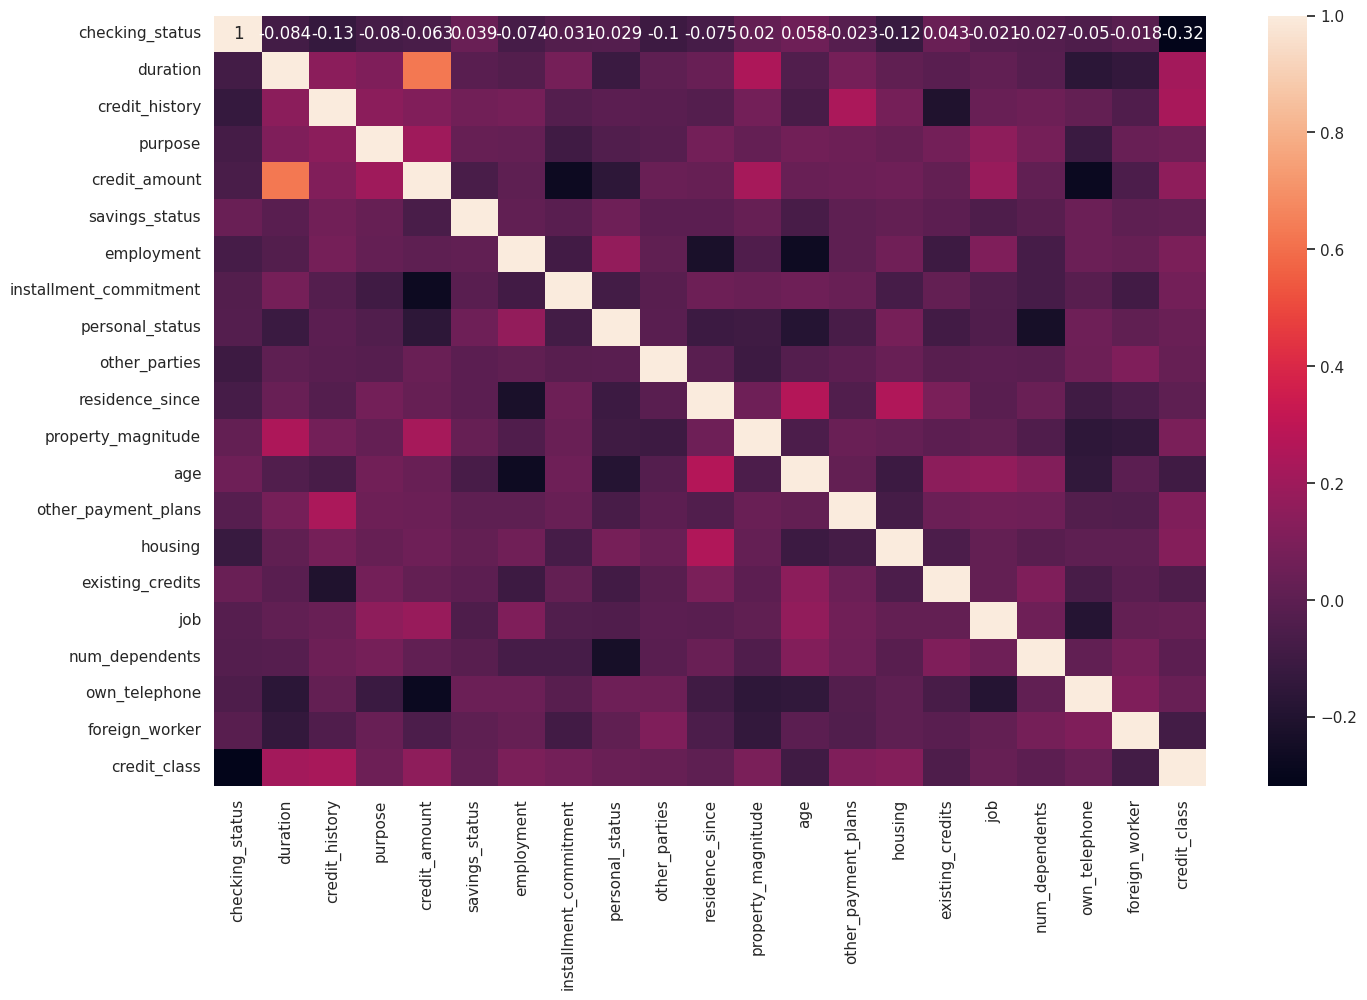

In [137]:
corr=df_num.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True)

/usr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/usr/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/usr/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

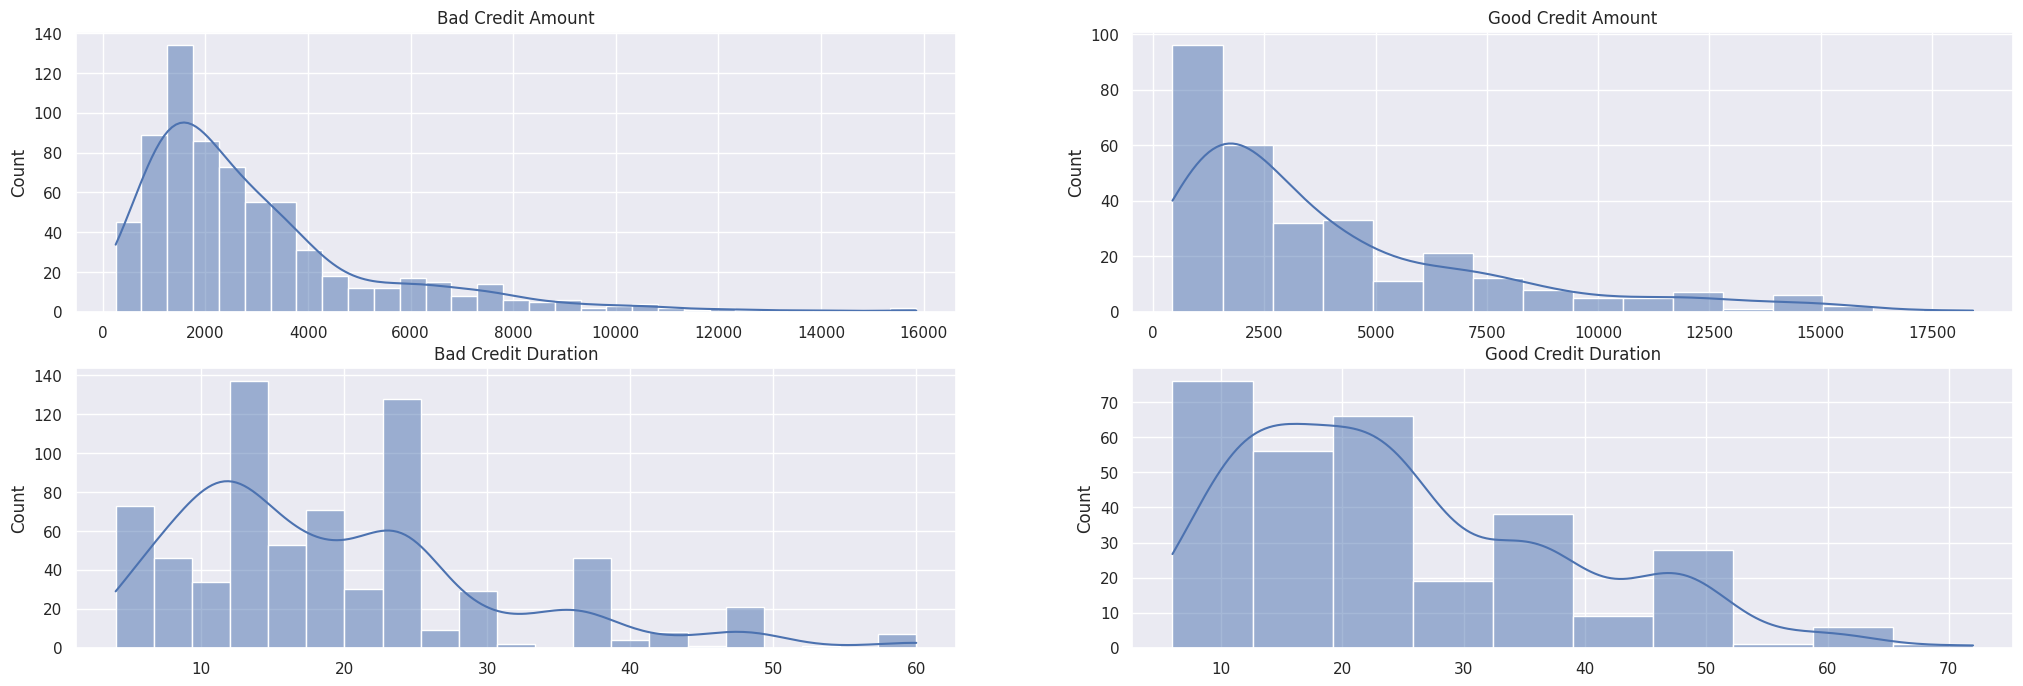

In [138]:
sns.set()
fig, axes = plt.subplots(2, 2, figsize=(25,8))
plt.xlabel=False
ax = sns.histplot(df_num.query("credit_class == 0")["credit_amount"], ax=axes[0,0], kde = True)
ax.set(xlabel=None)
ax1 = sns.histplot(df_num.query("credit_class == 1")["credit_amount"], ax=axes[0,1], kde = True)
ax1.set(xlabel=None)
ax2 = sns.histplot(df_num.query("credit_class == 0")["duration"], ax=axes[1,0], kde = True)
ax2.set(xlabel=None)
ax3 = sns.histplot(df_num.query("credit_class == 1")["duration"], ax=axes[1,1], kde = True)
ax3.set(xlabel=None)
axes[0,0].set_title('Bad Credit Amount')
axes[0,1].set_title('Good Credit Amount')
axes[1,0].set_title('Bad Credit Duration')
axes[1,1].set_title('Good Credit Duration')
plt.show()

### Positive relationship

In [139]:
corr_2 = corr[corr > 0.2]
corr_2_neg = corr[corr < -0.2]

/usr/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



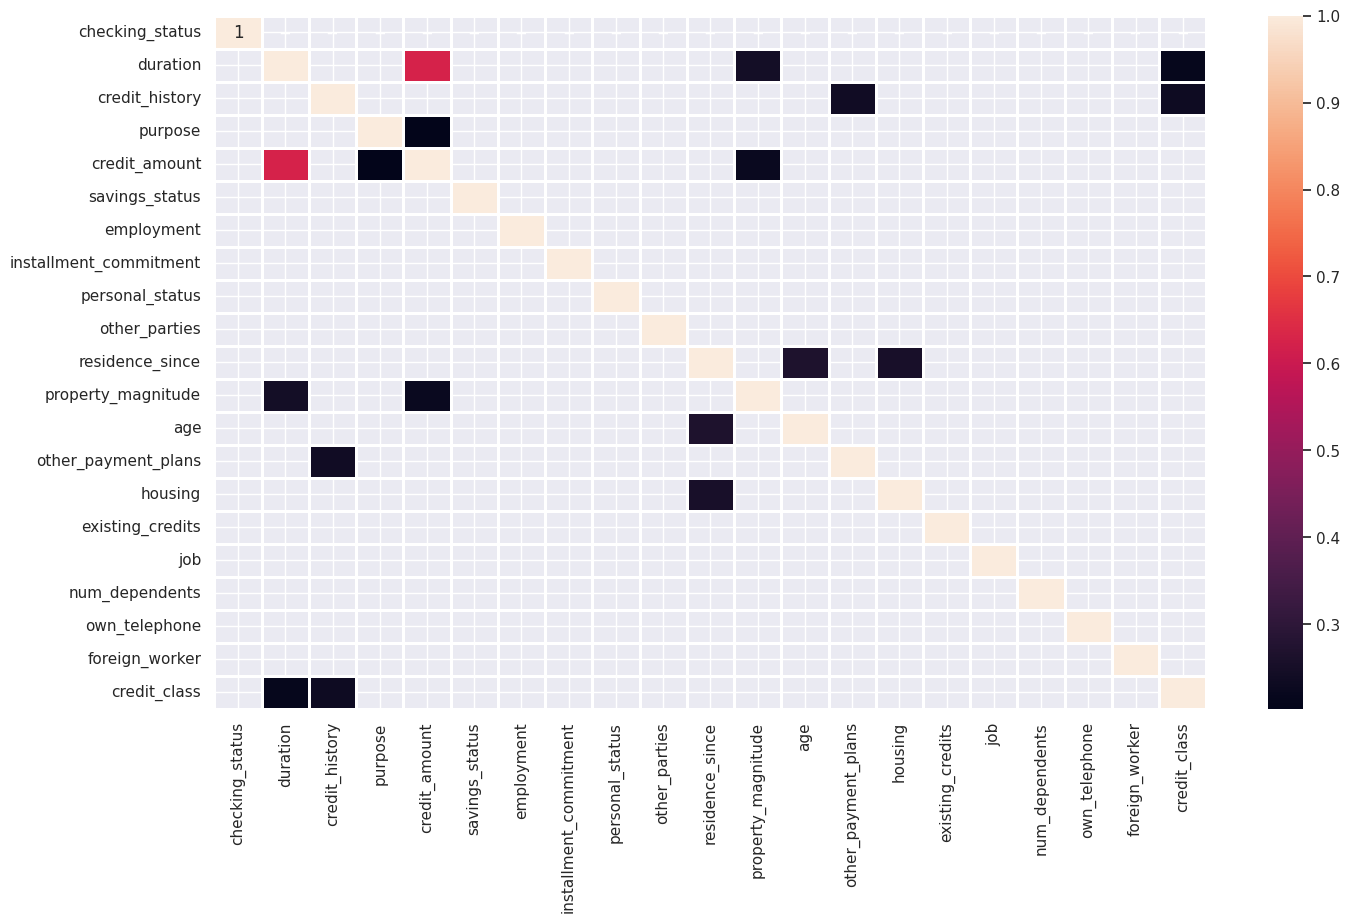

In [140]:
#positive relationship
plt.figure(figsize=(16,9))
ax = sns.heatmap(corr_2, annot=True, linewidths=2)

/usr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/usr/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/usr/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

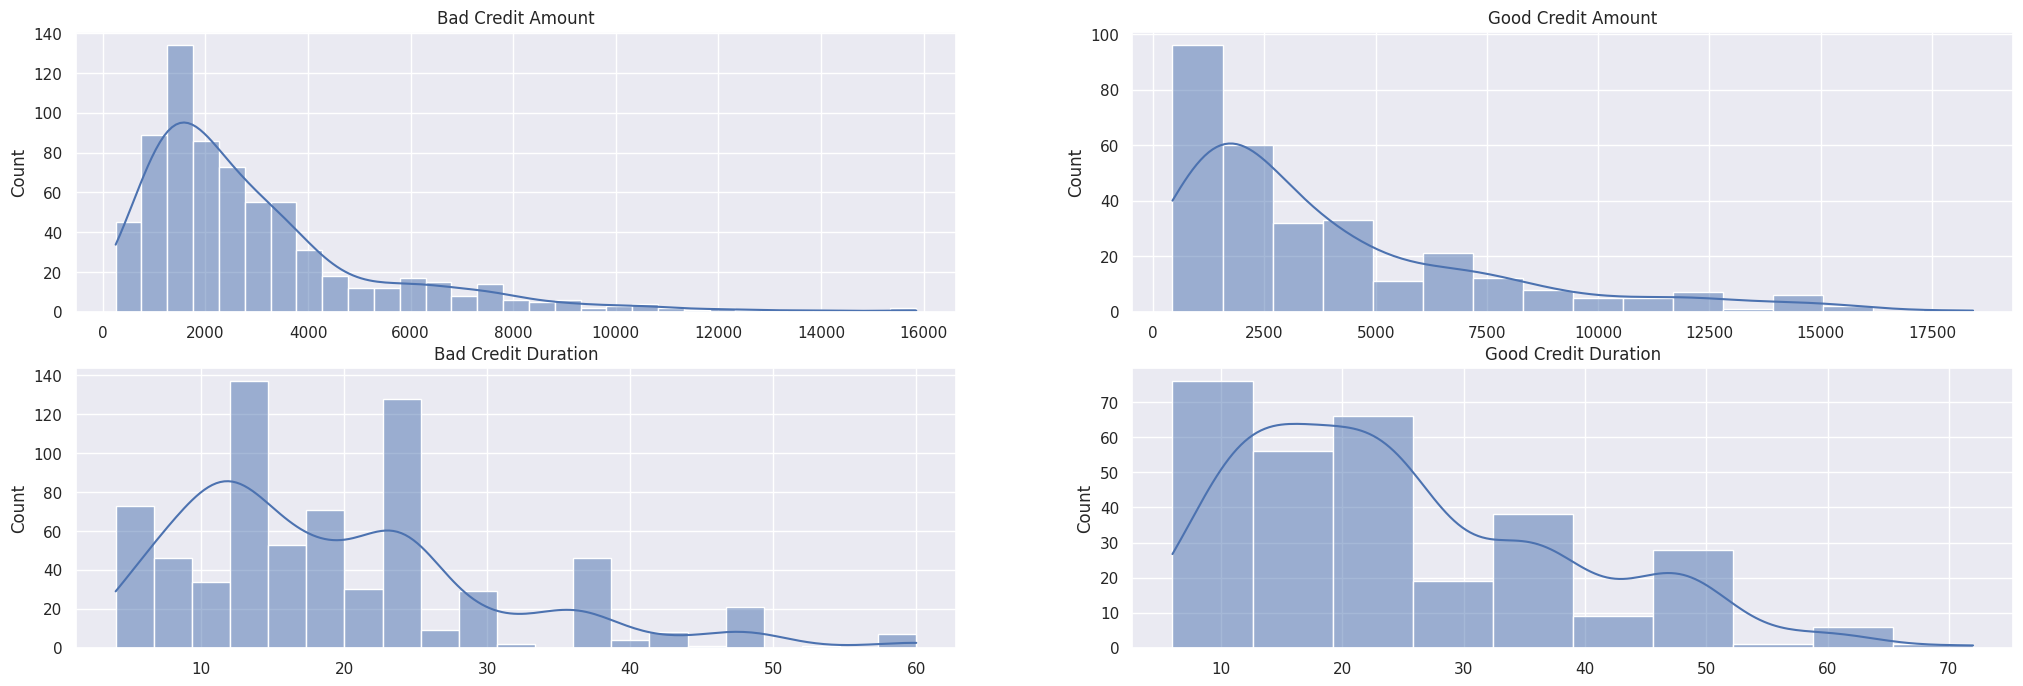

In [141]:
# Histogram of the most positive relationship between the features 
sns.set()
fig, axes = plt.subplots(2, 2, figsize=(25,8))
ax = sns.histplot(df_num.query("credit_class == 0")["credit_amount"], ax=axes[0,0], kde = True)
ax.set(xlabel=None)
ax1 = sns.histplot(df_num.query("credit_class == 1")["credit_amount"], ax=axes[0,1], kde = True)
ax1.set(xlabel=None)
ax2 = sns.histplot(df_num.query("credit_class == 0")["duration"], ax=axes[1,0], kde = True)
ax2.set(xlabel=None)
ax3 = sns.histplot(df_num.query("credit_class == 1")["duration"], ax=axes[1,1], kde = True)
ax3.set(xlabel=None)
axes[0,0].set_title('Bad Credit Amount')
axes[0,1].set_title('Good Credit Amount')
axes[1,0].set_title('Bad Credit Duration')
axes[1,1].set_title('Good Credit Duration')
plt.show()

In [142]:
px.scatter(df_num, x = "duration", y = "credit_amount", color=df_num['credit_class'].apply(lambda x: "bad credit" if x==0 else "good credit"), trendline = "ols")

In [143]:
#props_map = {'0':'real estate', '1':'life insurance', '2':'no known property','3':'car'}
props_map = {0:'real estate', 1:'life insurance', 2:'no known property',3:'car'}
px.scatter(df_num, x = "duration", y = "property_magnitude", color=df_num['credit_class'].apply(lambda x: "bad credit" if x==0 else "good credit"), trendline = "ols")

##### the above plot clear depicts the positive relation, but does not give information what property magnitude contains, so the bellow plot shows that

In [144]:
px.bar(df_new, x=df_new['duration'].apply(lambda x: x/100), y='property_magnitude', color=df_new['credit_class'].apply(lambda x: "bad credit" if x=='bad' else "good credit"),color_discrete_sequence=['red','blue'])

### Negative relationship

/usr/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



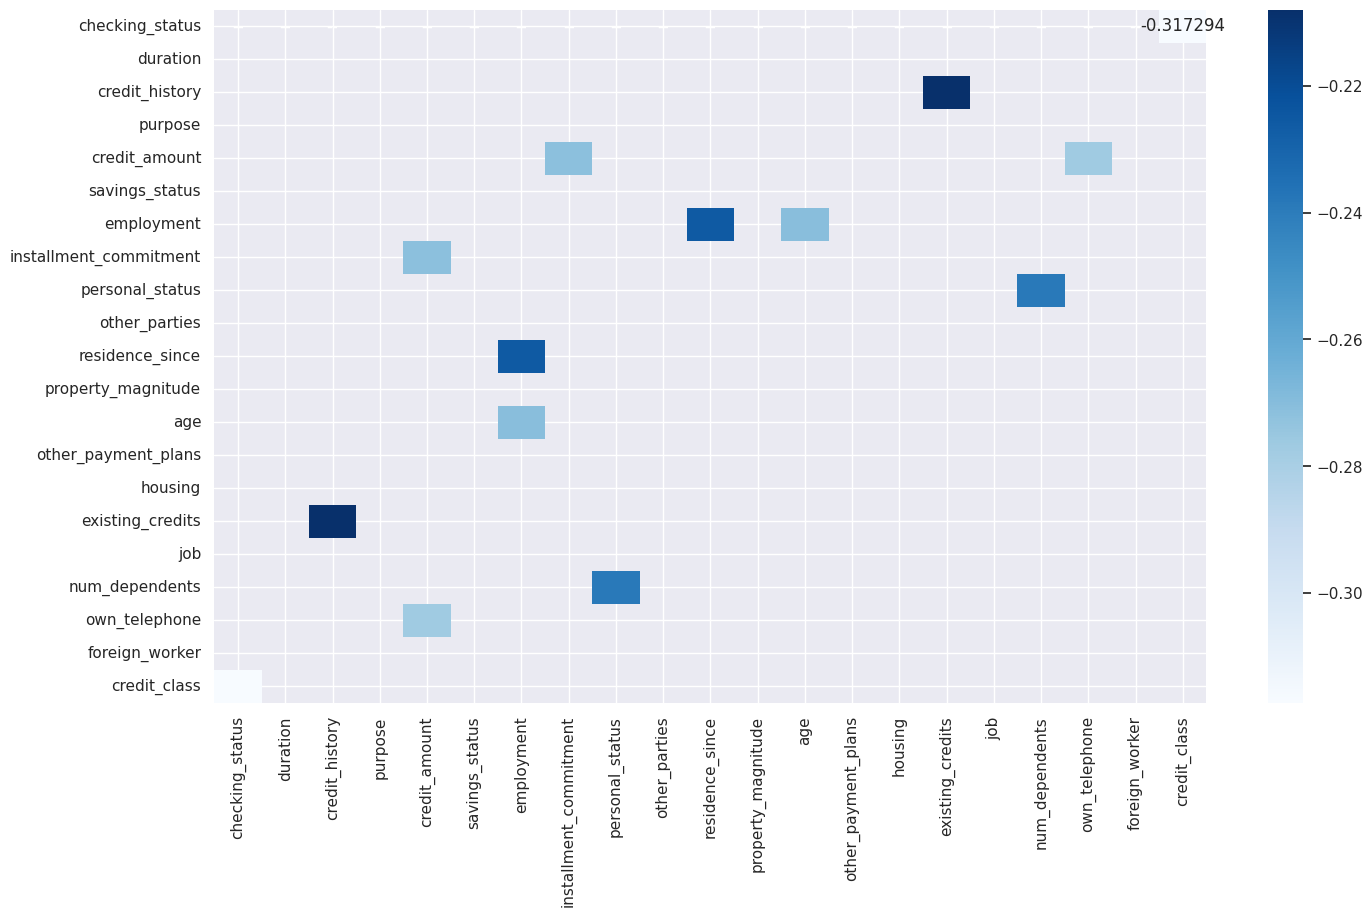

In [145]:
#negative relationship
plt.figure(figsize=(16,9))
ax = sns.heatmap(corr_2_neg, annot=True, cmap='Blues', fmt='g')

In [146]:
px.scatter(df_num, x = "age", y = "employment", color=df_num['credit_class'].apply(lambda x: "bad credit" if x==0 else "good credit"), trendline = "ols")

In [147]:
px.scatter(df_num, x = "credit_amount", y = "installment_commitment", color=df_num['credit_class'].apply(lambda x: "bad credit" if x==0 else "good credit"), trendline = "ols")

### Conclusion

I have used Categorical and Numerical approach to analyse dataset.

1) Numerical approach is used for correlation metrics, looked at two cases with positive relationship and two cases with negative relationship
•	Positive correlation
Credit amount and duration
Property magnitude and duration
With increase of credit amount duration rises.
Property magnitude contains different types of allocations, purchasing or investing in a new car   has the longest duration, comparing to life insurance.
•	Negative correlation
Employment and age
Credit amount and instalment commitment
With the rise of the age employment decreases (yearly retirement or retirement)
With an increase of the 'credit amount', it shows  a decline of the 'instalment commitment'

2) Categorical approach is using the categorical data within pandas query and grouping to analyse the dataset.
I have looked at a case of using ‘purpose’ and the ‘credit amount’ features, from the point of bad and good credit rating customers.
The customers with ‘bad credit rating’ have spend on new cars, while with ‘good credit rating’ have spend on radio and tv.
